In [1]:
pip install ipympl

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Elva\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import glob
from IPython.display import display, clear_output, HTML
from util import *
import requests 
import time

from sites.config import *
from util.general_util import *
from util.data_util import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
gridsize = 15
windowsize = 5000
avgstep = 100

In [3]:
site = LTA()
site_name = site.name
constraints1 = site.constraints1
constraints2 = site.constraints2
# ap_list = site.ap_list
#map_path = site.map_path
map_path = '../map/HKUST/HKUSTMap1F.jpg'
log_dir = '../data/HKUST_1F_Path2'
#log_dir = os.path.join('..',site.log_dir)
dataset_dir = '../data/HKUST_1F_Path2'
#dataset_dir = os.path.join('..',site.dataset_dir)
rp_locs = generate_line_grid(constraints1, gridsize) + generate_filled_grid(constraints2, gridsize)


## grid

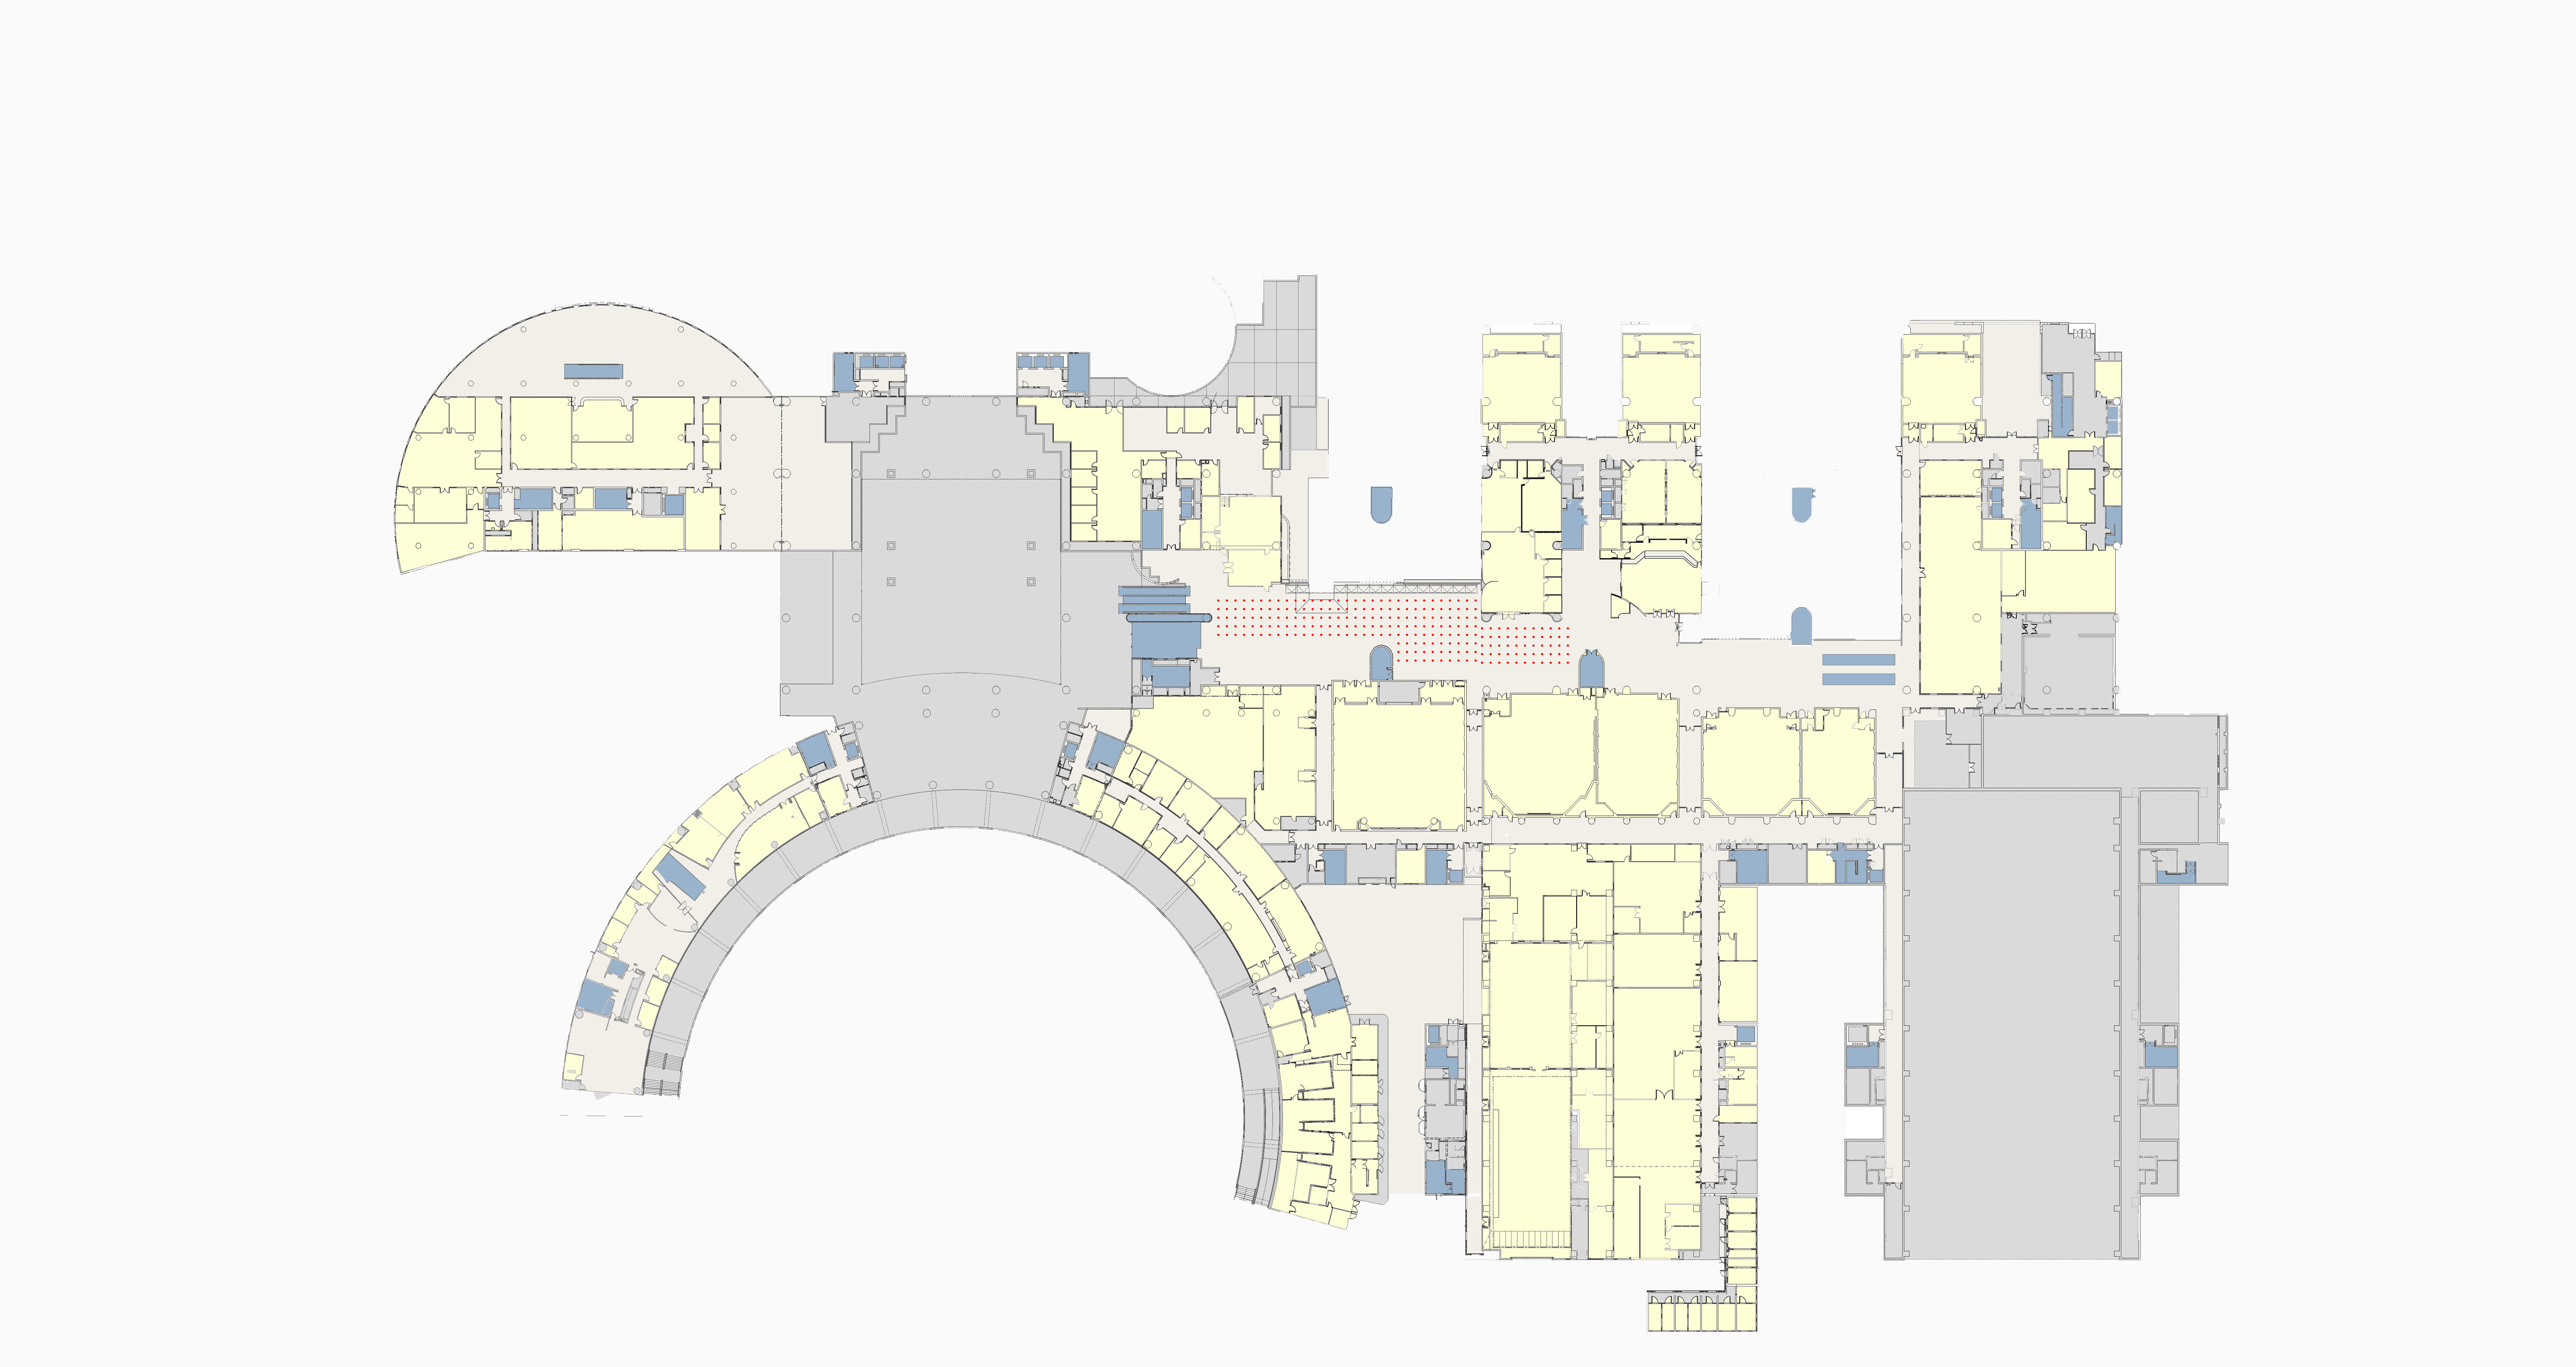

In [12]:
name = 'lta'
in_constraints = [(3445, 1390, 2835, 1390), (2835, 1390, 2835, 1500), (2835, 1500, 3255, 1500),
                  (3255, 1500, 3255, 1580),
                  (3255, 1580, 3650, 1580), (3650, 1580, 3650, 1450), (3650, 1450, 3445, 1450),
                  (3445, 1450, 3445, 1390)]
out_constraints = []
constraints1 = []
constraints2 = [([2840, 3250, 3250, 2840], [1400, 1400, 1490, 1490]),
                ([3260, 3440, 3440, 3260], [1400, 1400, 1550, 1550]),
                ([3455, 3640, 3640, 3455], [1465, 1465, 1560, 1560])]
map_path = '../map/HKUST/HKUSTMap1F.jpg'
dataset_dir = '../data/HKUST_1F_Path2'
dataset_dir2 = '../data/HKUST_1F_Path2_2'
log_dir = '../data/HKUST_1F_Path2'

#dataset_dir = '../data/lta'
#log_dir = '../models/lta'
transformation = [[-1.50989429e+06, 7.61140881e+03], [-1.12006819e+05, -1.28915062e+06],
                  [4.65277841e+07, 1.47134683e+08]]
scale = 40 / 3
gridsize = 20
rp_locs = generate_line_grid(constraints1, gridsize) + generate_filled_grid(constraints2, gridsize)

rp_locs = generate_line_grid(constraints1, gridsize) + generate_filled_grid(constraints2, gridsize)
rp_locs = list(set(rp_locs))
im = Image.open(map_path)
draw = ImageDraw.Draw(im)
r = 2
for j in range(0, len(rp_locs)):
    draw.ellipse((rp_locs[j][0]-r, rp_locs[j][1]-r, rp_locs[j][0]+r, rp_locs[j][1]+r), fill=(255, 0, 0, 255))
#im.save(os.path.join(log_dir, '%s_grid.jpg' % site_name))
display(im)

Number of Grids is 402


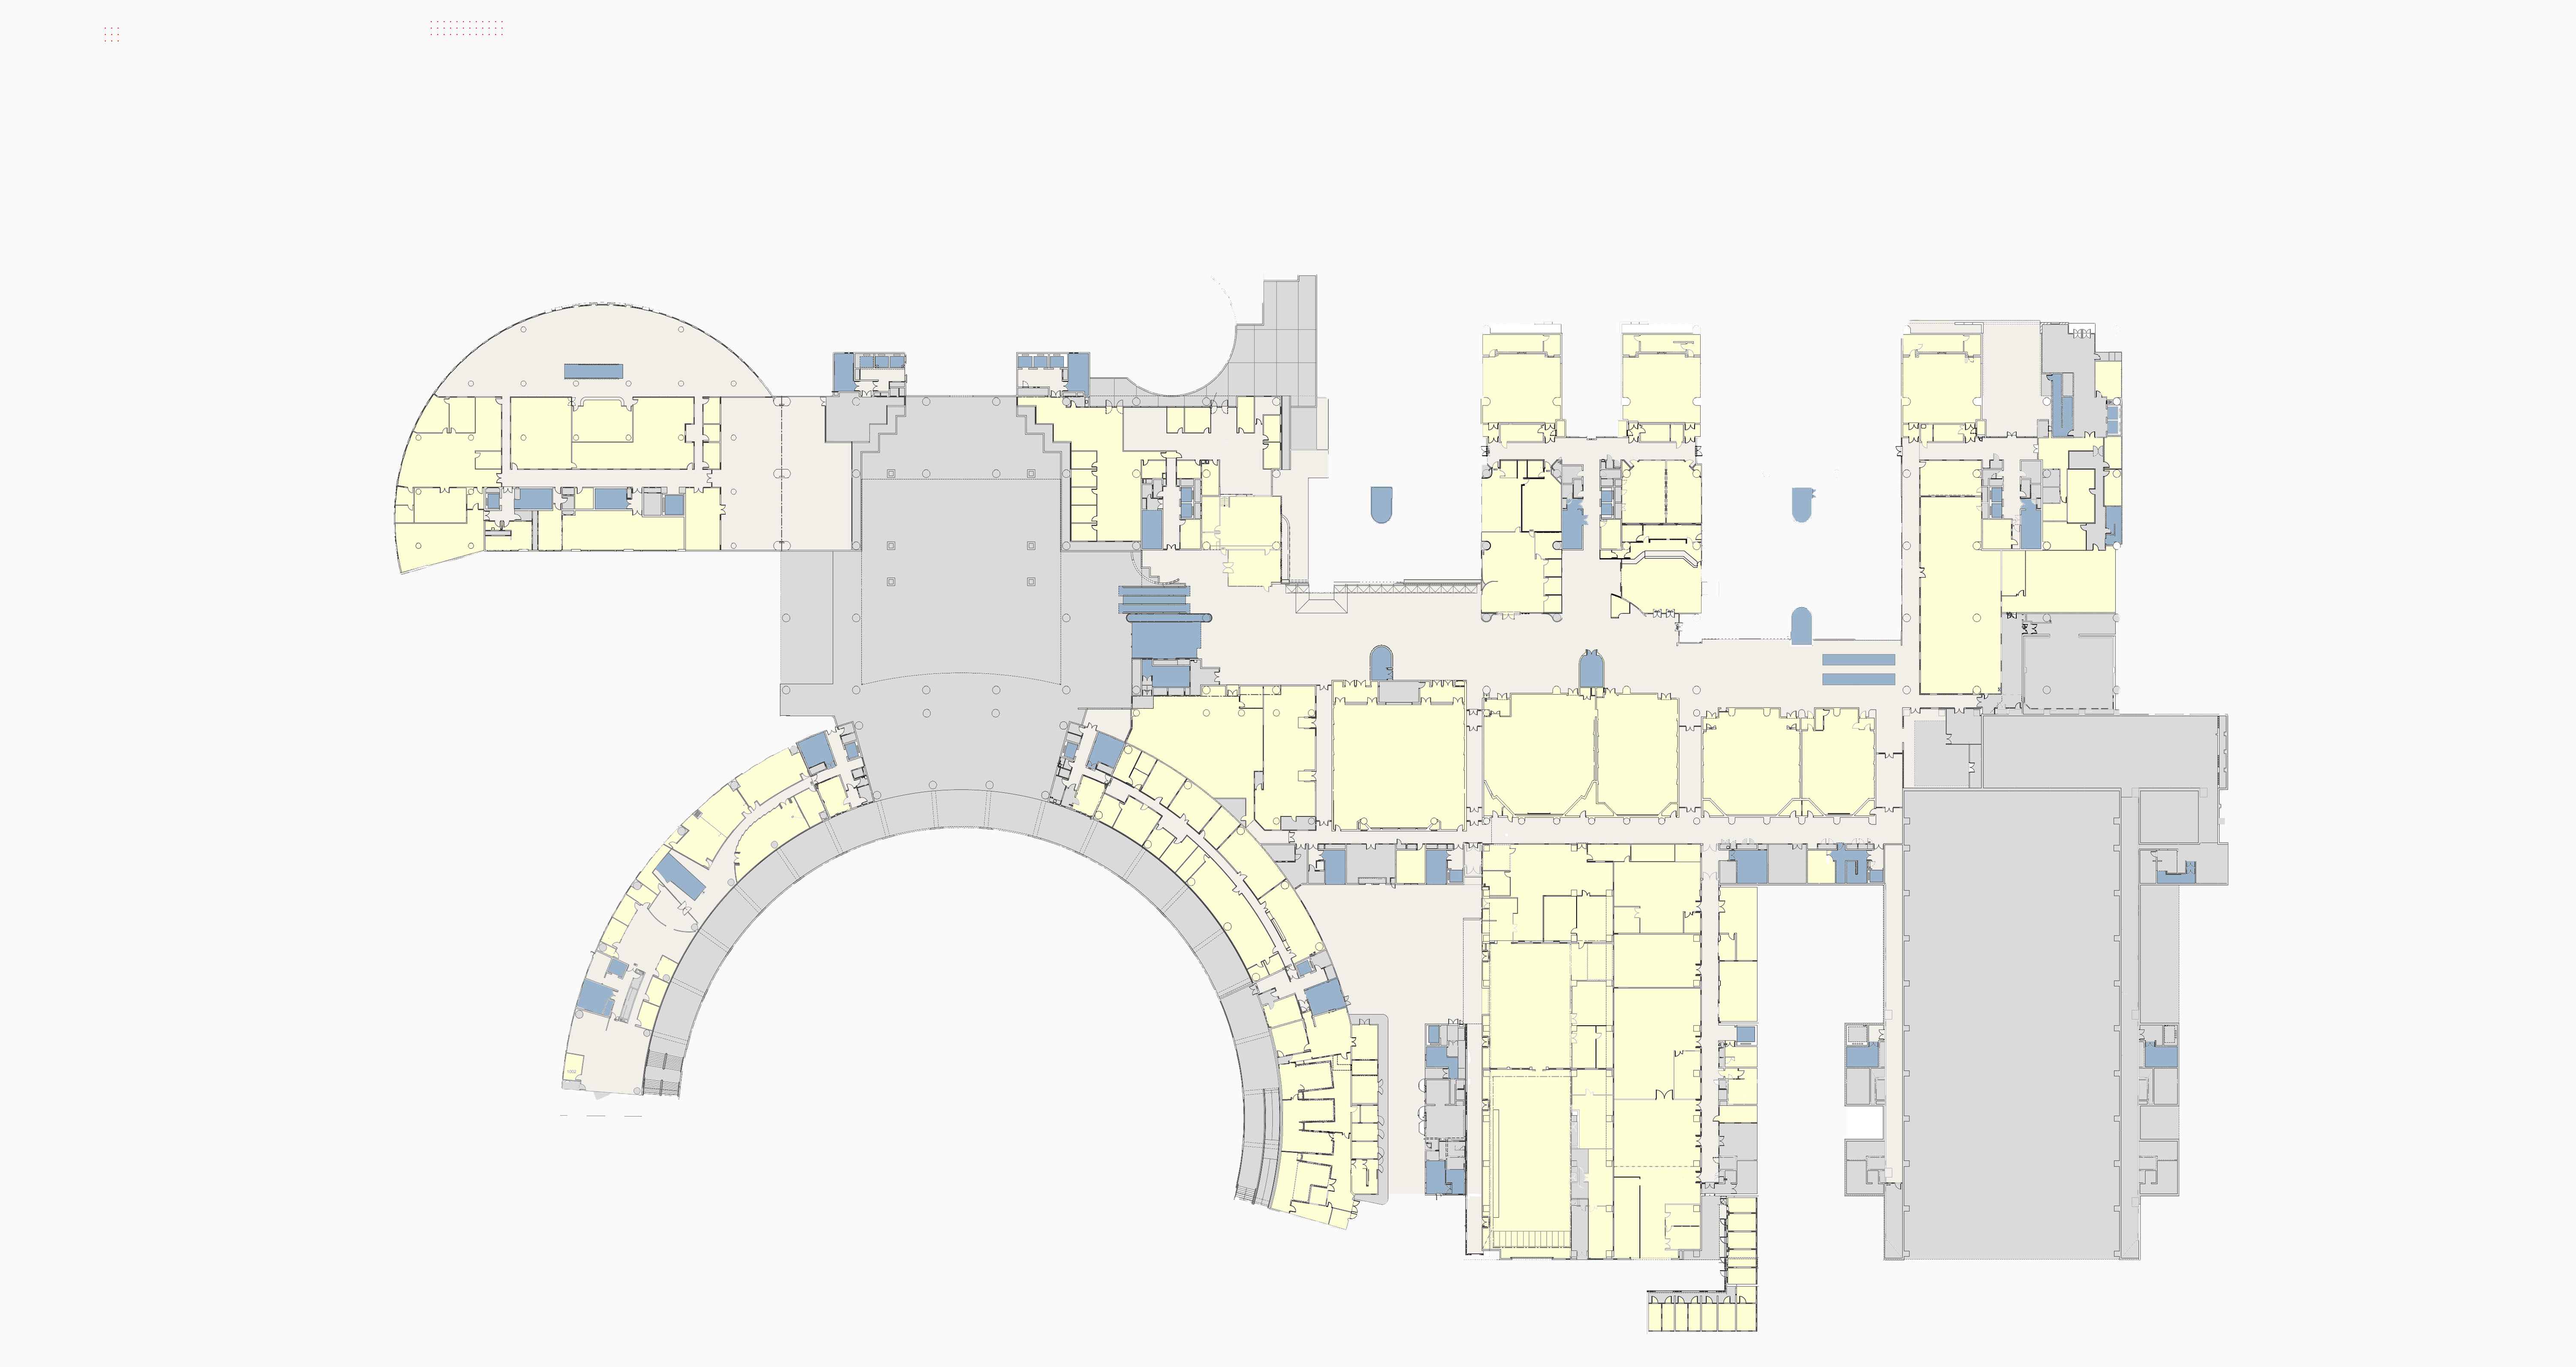

In [4]:
r = 1
print ("Number of Grids is " + str(len(rp_locs)))

#constraints1 = [[90,355,38,38], [45,355,51,51], [45,125,65,65],
#                [285,450,100,100], [450,610,88,95], [445,450,95,100], 
#                [615, 770, 95,95], [780, 1020, 98,98], [995, 1020, 85,85], 
#               ]
constraints1 = []
constraints2 = [[(245,245,275,275), (65,100,100,65)],
                [(1005,1005,1160,1160), (50,85,85,50)]
               ]
rp_locs = generate_line_grid(constraints1, gridsize) + generate_filled_grid(constraints2, gridsize)

im = Image.open(map_path)
draw = ImageDraw.Draw(im)
for j in range(0, len(rp_locs)):
    draw.ellipse((rp_locs[j][0]-r, rp_locs[j][1]-r, rp_locs[j][0]+r, rp_locs[j][1]+r), fill=(255,0,0,255))

display(im)

## wifi fingerprint

In [13]:
%matplotlib widget
fp_features, fp_locs, ap_list1 = read_wifi_fingerprint(glob.glob(os.path.join(dataset_dir, 'n*_WiFi.txt')))
test_features, test_locs, ap_list2 = read_wifi_fingerprint(glob.glob(os.path.join(dataset_dir2, 'm*_WiFi.txt')))
#print(fp_features)
#print(fp_locs)
#print(ap_list)

fig, ax = plt.subplots()
im = plt.imread(map_path)
ax.imshow(im)
for x, y in test_locs:
    plt.plot(x,y, 'ro', ms=1)

fig.show()

../data/HKUST_1F_Path2\naturally_HKUST_1F_15a14e2516f3f594_2840_1490_3440_1405_1603010259111_WiFi.txt
../data/HKUST_1F_Path2_2\middle_HKUST_1F_15a14e2516f3f594_2840_1490_3440_1405_1606264096627_WiFi.txt


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [14]:
rp_features = compute_reference_features(rp_locs, fp_features, fp_locs)

In [15]:
ap_ind = 0

fig, ax = plt.subplots(dpi=100)
ax.imshow(im)

heatmap = np.zeros(im.shape[:2])

for feature, loc in zip(rp_features[:,ap_ind], rp_locs):
    x, y = loc
    heatmap[int(y-gridsize/2):int(y+gridsize/2), int(x-gridsize/2):int(x+gridsize/2)] += feature

heatmap = np.ma.masked_where(heatmap == 0, heatmap)
    
ax.imshow(heatmap)

fig.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## magnetic fingerprint

In [17]:
x_train, y_train = read_magnetic_fingerprint(glob.glob(os.path.join(dataset_dir, 'n*_Sensors.txt')), grid_list, gridsize)

im = Image.open(map_path)
draw = ImageDraw.Draw(im)
for y in y_train:
    loc = grid_list[y.index(1)]
    draw.ellipse((loc[0]-3, loc[1]-3, loc[0]+3, loc[1]+3), fill=(255,0,0,255))

# im.show()

display(im)

NameError: name 'grid_list' is not defined